In [1]:
import numpy as np 
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D 


In [2]:
start_time  = time.time()
N = 1000
h=0.005

In [3]:
x1 = np.zeros(N, dtype='float')
x2 = np.zeros(N, dtype='float')
x3 = np.zeros(N, dtype='float')
x4 = np.zeros(N, dtype='float')

y1 = np.zeros(N, dtype='float')
y2 = np.zeros(N, dtype='float')
y3 = np.zeros(N, dtype='float')
y4 = np.zeros(N, dtype='float')


#deviation vectors
dx1 = np.zeros(N, dtype='float')
dx2 = np.zeros(N, dtype='float')
dx3 = np.zeros(N, dtype='float')
dx4 = np.zeros(N, dtype='float')

dy1 = np.zeros(N, dtype='float')
dy2 = np.zeros(N, dtype='float')
dy3 = np.zeros(N, dtype='float')
dy4 = np.zeros(N, dtype='float')

In [4]:
x1_vals = [0.2, 0.46, 0.01]
x2_vals = [-0.1, -0.1, -0.02]
x3_vals = [0.21, 0.21, 0.01]
x4_vals = [-0.1, -0.1, 0.02]

In [5]:
#function for normalizing deviation vectors
def alpha(dx, dy, dpx, dpy):
    return np.linalg.norm([dx, dy, dpx, dpy])

In [6]:
#empty vector to store the evolution of the X_1(t)
LCE = np.zeros(N, dtype = 'float')
RLI = np.zeros(N, dtype = 'float')
vec = np.zeros(N, dtype = 'float')
vec1 = np.zeros(N, dtype = 'float')
vec2 = np.zeros(N, dtype = 'float')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log


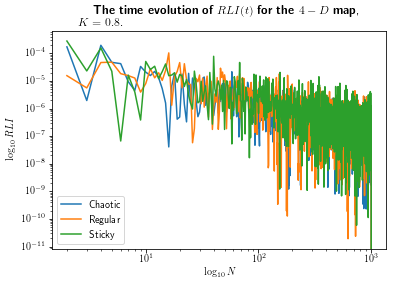

In [10]:
for idx in range(len(x1_vals)):
    x1[0] = x1_vals[idx]
    x2[0] = x2_vals[idx]
    x3[0] = x3_vals[idx]
    x4[0] = x4_vals[idx]
    
    y1[0] = x1_vals[idx] + 1e-14
    y2[0] = x2_vals[idx] + 1e-14
    y3[0] = x3_vals[idx] + 1e-14
    y4[0] = x4_vals[idx] + 1e-14
    
    #intial deviation vectors (normalized)
    dx1[0] = 1/alpha(1, 0, 0, 0)
    dx2[0] = 0
    dx3[0] = 0
    dx4[0] = 0
    
    #intial deviation vectors (normalized)
    dx1[0] = (1 + 1e-14)/alpha( 1 + 1e-14, 0, 0, 0)
    dx2[0] = 0
    dx3[0] = 0
    dx4[0] = 0
    #perturbed intial deviation vectors
    K = 0.8
    B = 0.1
    for i in range(N-1):
        x1[i+1] = (x1[i] + x2[i] + (K/(2*np.pi))*np.sin(2*np.pi*x1[i]) - (B/(2*np.pi))*np.sin(2*np.pi*(x3[i]-x1[i]))) % 1
        x2[i+1] = (x2[i] + (K/(2*np.pi))*np.sin(2*np.pi*x1[i]) - (B/(2*np.pi))*np.sin(2*np.pi*(x3[i] - x1[i]))) % 1
        x3[i+1] = (x3[i] + x4[i] + (K/(2*np.pi))*np.sin(2*np.pi*x3[i]) - (B/(2*np.pi))*np.sin(2*np.pi*(x1[i] - x3[i]))) % 1
        x4[i+1] = (x4[i] + (K/(2*np.pi))*(np.sin(2*np.pi*x3[i])) - (B/(2*np.pi))*np.sin(2*np.pi*(x1[i] - x3[i]))) % 1
        
        y1[i+1] = (y1[i] + y2[i] + (K/(2*np.pi))*np.sin(2*np.pi*y1[i]) - (B/(2*np.pi))*np.sin(2*np.pi*(y3[i]-y1[i]))) % 1
        y2[i+1] = (y2[i] + (K/(2*np.pi))*np.sin(2*np.pi*y1[i]) - (B/(2*np.pi))*np.sin(2*np.pi*(y3[i] - y1[i]))) % 1
        y3[i+1] = (y3[i] + y4[i] + (K/(2*np.pi))*np.sin(2*np.pi*y3[i]) - (B/(2*np.pi))*np.sin(2*np.pi*(y1[i] - y3[i]))) % 1
        y4[i+1] = (y4[i] + (K/(2*np.pi))*(np.sin(2*np.pi*y3[i])) - (B/(2*np.pi))*np.sin(2*np.pi*(y1[i] - y3[i]))) % 1
    
    
        #handle the integration of the deviation vectors
        dx1[i+1] = ( (1 + K*np.cos(2*np.pi*(x1[i] - x3[i])))*dx1[i] + dx2[i]  - B*np.cos(2*np.pi*(x3[i] - x1[i]))*dx3[i])%1
        dx2[i+1] = ((K*np.cos(2*np.pi*x1[i]) + B*np.cos(2*np.pi*(x3[i] - x1[i])))*dx1[i] + dx2[i] - B*np.cos(2*np.pi*(x3[i] - x1[i])))%1
        
        dx3[i+1] = (-B*np.cos(2*np.pi*(x1[i] - x3[i]))*dx1[i] + (1 + K*np.cos(2*np.pi*(x3[i])) + B*np.cos(2*np.pi*(x1[i] - x3[i])))*dx3[i])%1
        dx4[i+1] = (-B*np.cos(2*np.pi*(x1[i] - x3[i]))*dx1[i] + (K*np.cos(2*np.pi*(x3[i])) + B*np.cos(2*np.pi*(x1[i] - x3[i])))*dx3[i])%1
        
        
        dy1[i+1] = ( (1 + K*np.cos(2*np.pi*(y1[i] - y3[i])))*dy1[i] + dy2[i]  - B*np.cos(2*np.pi*(y3[i] - y1[i]))*dy3[i])%1
        dy2[i+1] = ((K*np.cos(2*np.pi*y1[i]) + B*np.cos(2*np.pi*(y3[i] - y1[i])))*dy1[i] + dy2[i] - B*np.cos(2*np.pi*(y3[i] - y1[i])))%1
        
        dy3[i+1] = (-B*np.cos(2*np.pi*(y1[i] - y3[i]))*dy1[i] + (1 + K*np.cos(2*np.pi*(y3[i])) + B*np.cos(2*np.pi*(y1[i] - y3[i])))*dy3[i])%1
        dy4[i+1] = (-B*np.cos(2*np.pi*(y1[i] - y3[i]))*dy1[i] + (K*np.cos(2*np.pi*(y3[i])) + B*np.cos(2*np.pi*(y1[i] - y3[i])))*dy3[i])%1
        
        
        #handle the computation of the RLI
        
        for idx in range(i):
            if i ==0:
                vec1[idx] = np.log(alpha(dx1[idx], dx2[idx], dx3[idx], dx3[idx]))
                vec2[idx] = np.log(alpha(dy1[idx], dy2[idx], dy3[idx], dy3[idx]))
                RLI[i] = (1/h)*(np.sum(np.linalg.norm([vec2[idx] - vec1[idx]])))
            else:
                vec1[idx] = np.log(alpha(dx1[idx], dx2[idx], dx3[idx], dx3[idx]))
                vec2[idx] = np.log(alpha(dy1[idx], dy2[idx], dy3[idx], dy3[idx]))
            RLI[i] = (1/i*h)*np.sum(np.linalg.norm([vec2[idx] - vec1[idx]]))
        #renormalize deviation vectors
        dx1[i+1] = dx1[i+1]/alpha(dx1[i+1], dx2[i+1], dx3[i+1], dx3[i+1])
        dx2[i+1] = dx2[i+1]/alpha(dx1[i+1], dx2[i+1], dx3[i+1], dx3[i+1])
        dx3[i+1] = dx3[i+1]/alpha(dx1[i+1], dx2[i+1], dx3[i+1], dx3[i+1])
        dx4[i+1] = dx4[i+1]/alpha(dx1[i+1], dx2[i+1], dx3[i+1], dx3[i+1])
        dy1[i+1] = dy1[i+1]/alpha(dy1[i+1], dy2[i+1], dy3[i+1], dy3[i+1])
        dy2[i+1] = dy2[i+1]/alpha(dy1[i+1], dy2[i+1], dy3[i+1], dy3[i+1])
        dy3[i+1] = dy3[i+1]/alpha(dy1[i+1], dy2[i+1], dy3[i+1], dy3[i+1])
        dy3[i+1] = dy3[i+1]/alpha(dy1[i+1], dy2[i+1], dy3[i+1], dy3[i+1])
    plt.loglog(np.linspace(0, N, N),RLI)
    #plt.plot(np.log10(np.linspace(0, N, N)), np.log10(RLI))
    plt.title(r'\textbf{The time evolution of $RLI(t)$ for the $4-D$ map},\\$K = 0.8$.')
    plt.xlabel(r'$\log_{10}N$')
    plt.ylabel(r'$\log_{10}RLI$')
    plt.legend(['Chaotic', 'Regular', 'Sticky'])

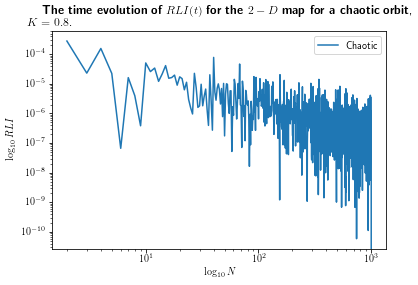

In [11]:
plt.loglog(np.linspace(0, N, N),RLI)
#plt.plot(np.log10(np.linspace(0, N, N)), np.log10(RLI))
plt.title(r'\textbf{The time evolution of $RLI(t)$ for the $2-D$ map for a chaotic orbit},\\$K = 0.8$.')
plt.xlabel(r'$\log_{10}N$')
plt.ylabel(r'$\log_{10}RLI$')
plt.legend(['Chaotic', 'Regular', 'Sticky'])

Text(0.5, 0, '$x_{3}$')

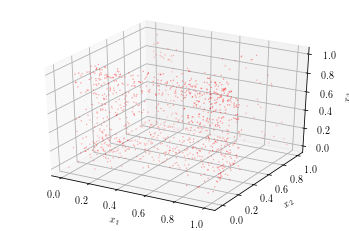

In [9]:
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, x3, s=0.05, c='red')  
ax.set_xlabel(r'$x_{1}$')
ax.set_ylabel(r'$x_{2}$')
ax.set_zlabel(r'$x_{3}$')
